In [3]:
class Ship:
    
    '''
    Класс корабля:
    crew - размер экипажа
    sick - количество изначально зараженных
    infected - объект-носитель инфекции
    inf_params - параметры поведения носителя
    '''
    
    def __init__(self, crew, sick, infected, inf_params):
        self.crew = crew
        self.isolation = 0
        self.active = crew-self.isolation-sick
        self._infected = infected
        self._inf_params = inf_params
        self.sick = [self._infected(**self._inf_params)]*sick
        self.good = self.crew-sick
        self.days = 0
        
    def next_day(self):
        
        '''
        Функция обновления статистики корабля в новый день пребывания в море
        '''
        
        if self.isolation<self.crew:
            self.days += 1
            new = min(sum([x.try_infect() for x in self.sick]), self.good)
            self.isolation = sum([i.inkub==0 for i in self.sick])
            self.sick += ([self._infected(**self._inf_params) for _ in range(new)])
            self.good += -new
            #print(f'Шел {self.days} день, Заразилось {new}, всего зараженных {self.good}, на изоляции {self.isolation}')
            pass
       

In [4]:
import numpy as np

class Infected:
    
    '''
    Пример объект-носителя инфекции
    Количество зараженных объетом в день имеет биномиальное распредение B(n, p)
    После появления симпотомов данный объект самоизолируется и перестает заражать окружающих
    '''
    
    def __init__(self, inkub, n, p):
        self.inkub = inkub
        self.n = n
        self.p = p
        
    def try_infect(self):
        if self.inkub:
            self.inkub += -1
            return np.random.binomial(self.n, self.p)
        else:
            return 0

In [29]:
def distrib_days(pop, n_sick, inf_params, n_exp):
    
    '''
    Функция сбора статистики по экспериментам
    Выполняет подсчет количества дней, на который каждый побывал на изоляции
    И выводит распределение этих дней
    '''
    
    lst = []
    for _ in range(n_exp):
        tortuga = Ship(pop, n_sick, infected=Infected, inf_params=inf_params)
        while tortuga.isolation!=pop:
            tortuga.next_day()
        lst.append(tortuga.days)

    return pd.Series(lst).hist(bins=22, figsize=(12,7))

Пример использования: Боцман корабля «Тортуга» заразился неизвестным вирусом в последний день на суше перед долгим плаванием. Симптомы у носителя вируса появляются на 14-й день после дня заражения. На корабле «Тортуга» больной с симптомами сразу же отправляется на самоизоляцию в трюм и теряет возможность заражать других (в день проявления симптомов больной никого не заражает). Количество людей, которых заразит один носитель вируса в день при неограниченном кол-ве жертв, имеет биномиальное распределение с параметрами n=10 и p=0.08, и не зависит от кол-ва других носителей. На корабле 124 человека.

На какой день плавания наиболее вероятно, что обнаружится, что все люди на корабле побывали в трюме?

### Отправляем в 100000 плаваний

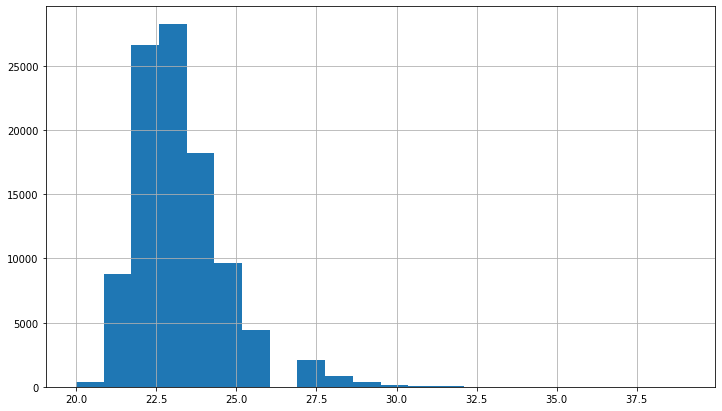

In [31]:
#Экипаж
crew = 124

#Боцман
n_sick = 1

#Параметры инфекции
inf_params = {'inkub':14, 'n':10, 'p':0.08}

n_exp = 100000

distrib_days(crew, n_sick, inf_params, n_exp)

В соответствии с условиями задачи инфекция распространяется довольно стремительно
И наиболее вероятно, что все побывают на карантине на 23 день плавания